<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data prep

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [15]:
df = pd.read_csv('capdist.csv')

# We are interest in the following countries to be included
countries = ["USA","JPN","CAN","VEN","BRA","UK","FRN","GMY","SLV","RUS","FIN","SWD","GHA","TOG","NIG","EGY","SYR","SPN","ITA"]
orig_countries = ["USA","Japan","Canada","Venezuela","Brazil","United Kingdom","France","Germany","Slovakia","Russia","Finland","Sweden","Ghana","Togo","Nigeria","Egypt","Syria","Spain","Italy"]

# Filter the country 1 and country 2 by above list
df_filt = df.loc[df['ida'].isin(countries) & df['idb'].isin(countries)]
     
     

In [18]:
# Now we want to form the matrix out of the following list
def cnt_to_dist(df,countries,i,j):

  if i == j:
    return 0
  
  the_df = df.loc[(df['ida'] == countries[i]) & (df['idb'] == countries[j])]
  return the_df['kmdist'].values[0]

Nc = len(countries)
D =np.array([[cnt_to_dist(df,countries,i,j) for i in range(Nc)] for j in range(Nc)])
     

Text(0.5, 1.0, 'Distance (km) between major cities')

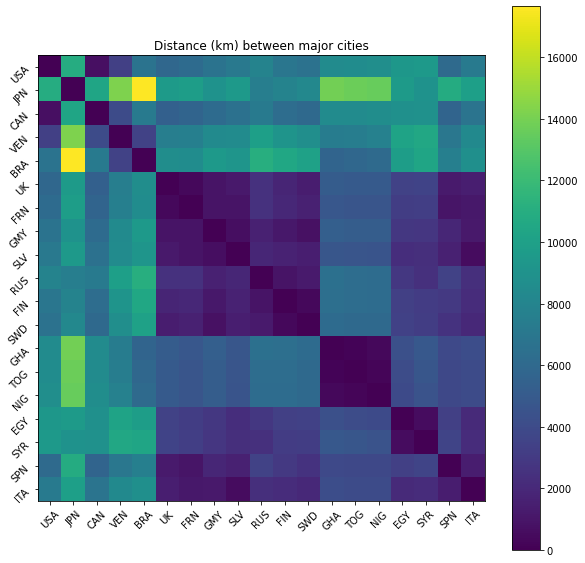

In [4]:
# Visualize the Output distance matrix

plt.figure(figsize=(10,10))
plt.imshow(D)
_=plt.xticks(np.arange(len(countries)), countries,rotation=45)
_=plt.yticks(np.arange(len(countries)), countries,rotation=45)
cbar = plt.colorbar()
plt.title('Distance (km) between major cities')

# Time for analysis

In [8]:
embedding = MDS(n_components=3)
D_trans = embedding.fit_transform(D)
print(D_trans.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


(19, 3)


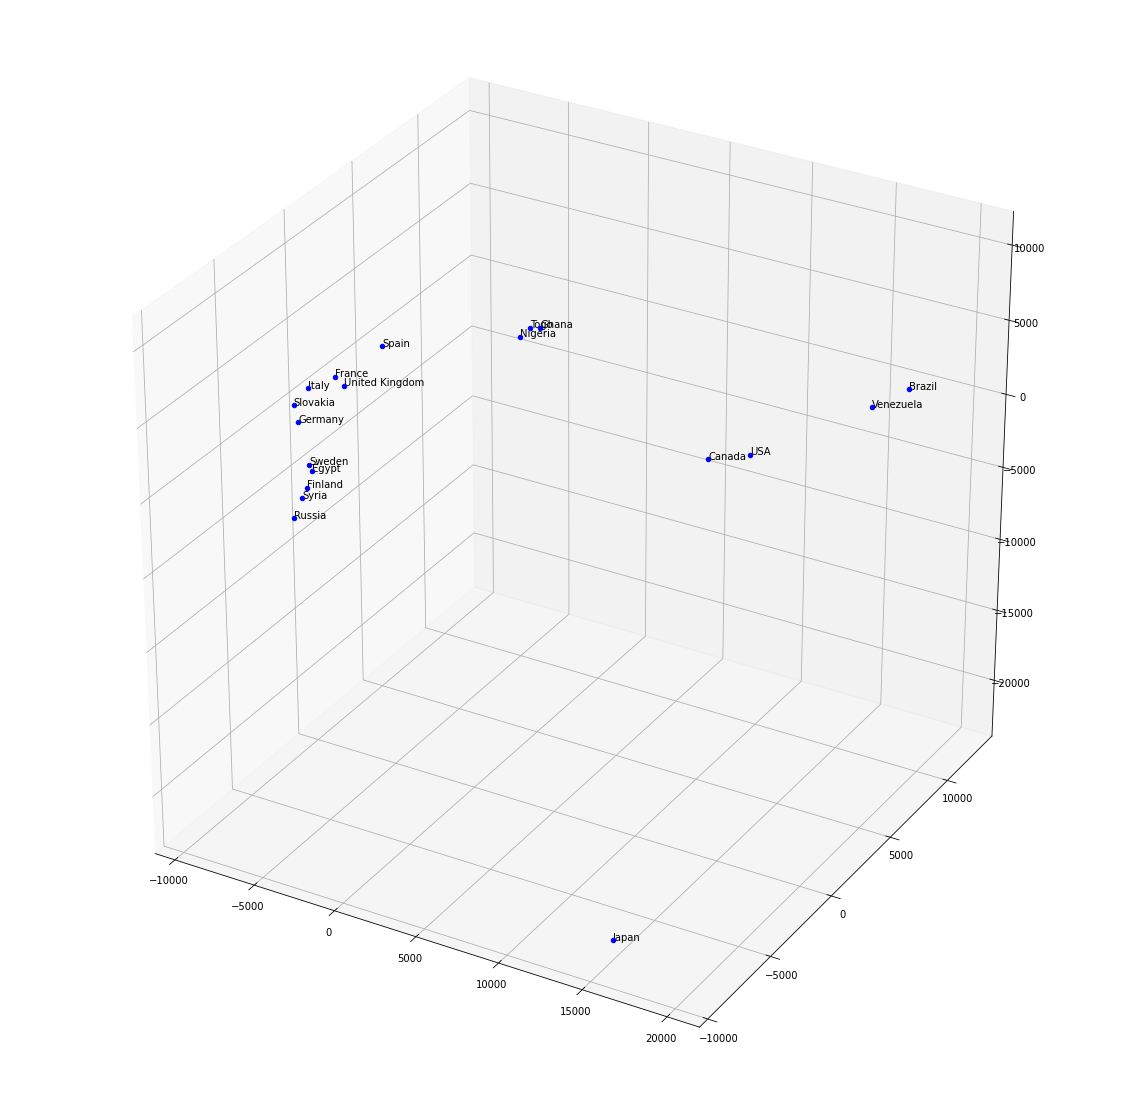

In [13]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(projection='3d')

for c in range(len(orig_countries)):
  ax.scatter(D_trans[c,0],D_trans[c,1],D_trans[c,2],color='b')
  ax.text(D_trans[c,0],D_trans[c,1],D_trans[c,2],orig_countries[c])


Text(0.5, 1.0, 'Dissimilarity between major countries')

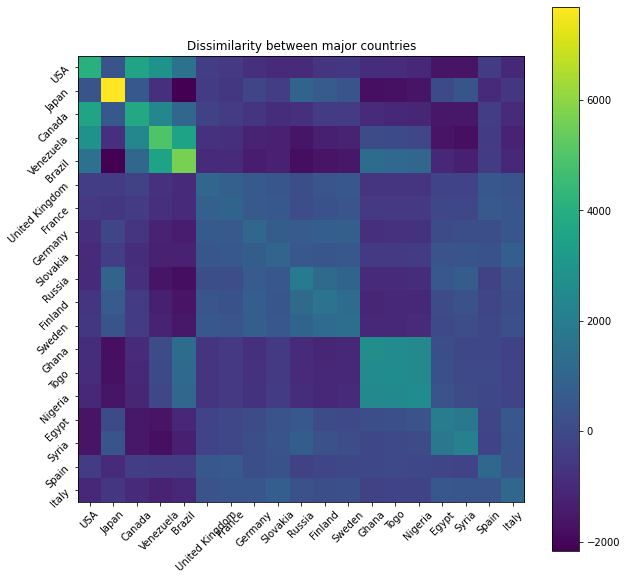

In [20]:
# I will use my own

O = np.ones_like(D)
 # 1*1 matrix for later use
N = D.shape[0]

S = -1/2*(D-1/N*D@O-1/N*O@D+1/N**2*O@D@O)

# Lets test
plt.figure(figsize=(10,10))
plt.imshow(S)
_=plt.xticks(np.arange(len(orig_countries)), orig_countries,rotation=45)
_=plt.yticks(np.arange(len(orig_countries)), orig_countries,rotation=45)
cbar = plt.colorbar()
plt.title('Dissimilarity between major countries')

(3, 19)


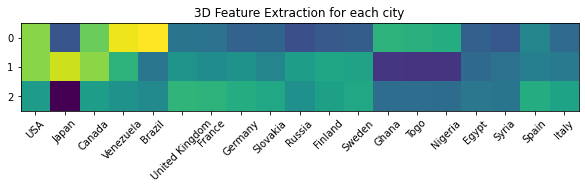

In [23]:
# We are going to perform eigen decomposition of S to find X
lambd,V = np.linalg.eig(S)

# Sort the eigenvectors and values based on eigenvalue
index = lambd.argsort()[::-1]
V_sorted = V[:,index]
L_sorted = np.diag(lambd[index])

# Only extract the top two V and L 
Nd = 3
V = V_sorted[:,:3]
L = L_sorted[:3,:3]

# Structure the data in 2D subspace
X = np.sqrt(L)@V.T

# Lets test
plt.figure(figsize=(10,10))
plt.imshow(X)
plt.title('3D Feature Extraction for each city')
_=plt.xticks(np.arange(len(orig_countries)), orig_countries,rotation=45)

print(X.shape)

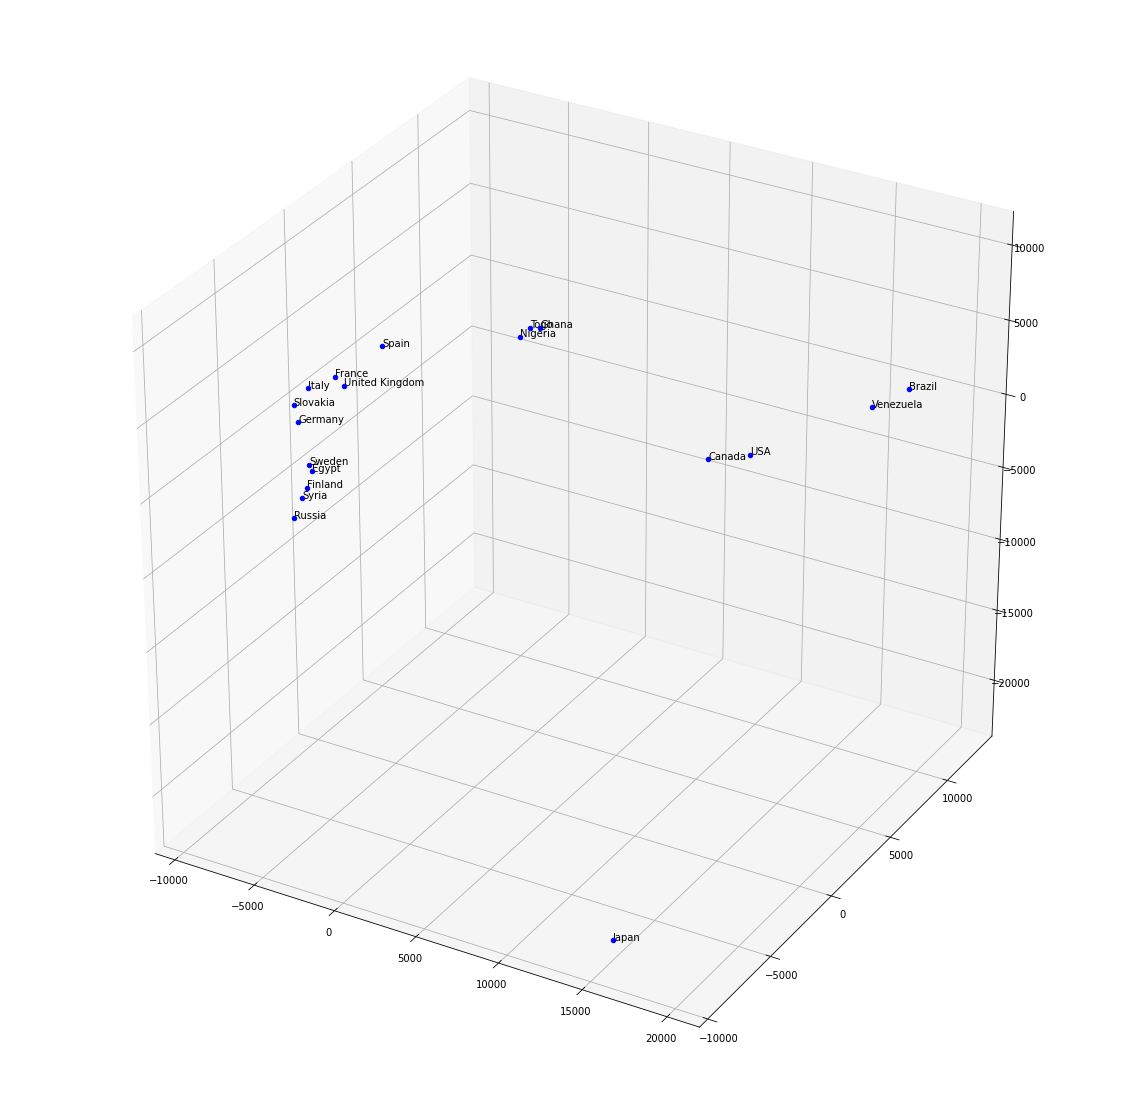

In [24]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(projection='3d')
X = X.T
for c in range(len(orig_countries)):
  ax.scatter(D_trans[c,0],D_trans[c,1],D_trans[c,2],color='b')
  ax.text(D_trans[c,0],D_trans[c,1],D_trans[c,2],orig_countries[c])